In [1]:
df<-read.csv('d:/data/iris/iris2.csv')
head(df)

sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,target,Result
5.1,3.5,1.4,0.2,setosa,0
4.9,3.0,1.4,0.2,setosa,0
4.7,3.2,1.3,0.2,setosa,0
4.6,3.1,1.5,0.2,setosa,0
5.0,3.6,1.4,0.2,setosa,0
5.4,3.9,1.7,0.4,setosa,0


In [2]:
library(dplyr)
df<-df %>% select(-target)

#Result 변수를 Factor 타입으로 변환(숫자가 아닌 카테고리형으로 변환)
str(df)
df$Result <- as.factor(df$Result)
str(df)

dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



'data.frame':	150 obs. of  5 variables:
 $ sepal.length..cm.: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal.width..cm. : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal.length..cm.: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal.width..cm. : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Result           : int  0 0 0 0 0 0 0 0 0 0 ...
'data.frame':	150 obs. of  5 variables:
 $ sepal.length..cm.: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal.width..cm. : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal.length..cm.: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal.width..cm. : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Result           : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 1 1 1 1 1 ...


[1] 150   5

sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,Result
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0
5.4,3.9,1.7,0.4,0


In [3]:
library(caret)
set.seed(123)
#학습용:검증용 8:2로 구분
idx_train<-createDataPartition(y=df$Result,p=0.8,list=F)
train<-df[idx_train,]
X_train<-train[,-5]
y_train<-train[,5]
test<-df[-idx_train,]
X_test<-test[,-5]
y_test<-test[,5]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [4]:
library(nnet) #인공신경망 모형, 은닉층의 노드 갯수 10
model<-nnet(Result ~ . , data=train, size=10)
summary(model)
#4-10-1
#input layer의 노드 갯수 : 4개 (독립변수 4개)
#hidden layer의 노드 갯수 : 10 개
#output layer의 노드 갯수 : 1개

# weights:  83
initial  value 149.701856 
iter  10 value 49.913437
iter  20 value 0.304782
iter  30 value 0.000104
iter  30 value 0.000052
iter  30 value 0.000052
final  value 0.000052 
converged


a 4-10-3 network with 83 weights
options were - softmax modelling 
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 
  2.06   7.12   5.21  -2.54  -2.95 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 
 46.76  14.73  14.48 -28.59 -23.53 
 b->h3 i1->h3 i2->h3 i3->h3 i4->h3 
  0.10   2.89   1.40   1.96   0.40 
 b->h4 i1->h4 i2->h4 i3->h4 i4->h4 
  1.08   5.76   4.85  -0.25  -0.56 
 b->h5 i1->h5 i2->h5 i3->h5 i4->h5 
 -0.59  -1.21  -1.24  -0.17   0.17 
 b->h6 i1->h6 i2->h6 i3->h6 i4->h6 
  0.52   1.37   0.78  -0.01   0.38 
 b->h7 i1->h7 i2->h7 i3->h7 i4->h7 
  0.02   0.51  -0.38   0.87   0.05 
 b->h8 i1->h8 i2->h8 i3->h8 i4->h8 
  0.65   4.69   1.05   5.96   2.93 
 b->h9 i1->h9 i2->h9 i3->h9 i4->h9 
 -2.19  -5.66 -15.19  21.20  11.94 
 b->h10 i1->h10 i2->h10 i3->h10 i4->h10 
   0.42   -1.11   -0.78   -0.26   -0.62 
  b->o1  h1->o1  h2->o1  h3->o1  h4->o1  h5->o1  h6->o1  h7->o1  h8->o1  h9->o1 
  -0.36    3.42   25.85   -1.55    1.69   -0.37   -0.65   -2.00   -3.76  -26.77 
h10->o1 
   0.37 
  b->o2  h1->o2  h2->o2

Warning message:
"package 'devtools' was built under R version 3.6.2"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.2"SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d
Loading required package: scales
Warning message:
"package 'scales' was built under R version 3.6.2"Loading required package: reshape
Warning message:
"package 'reshape' was built under R version 3.6.2"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename



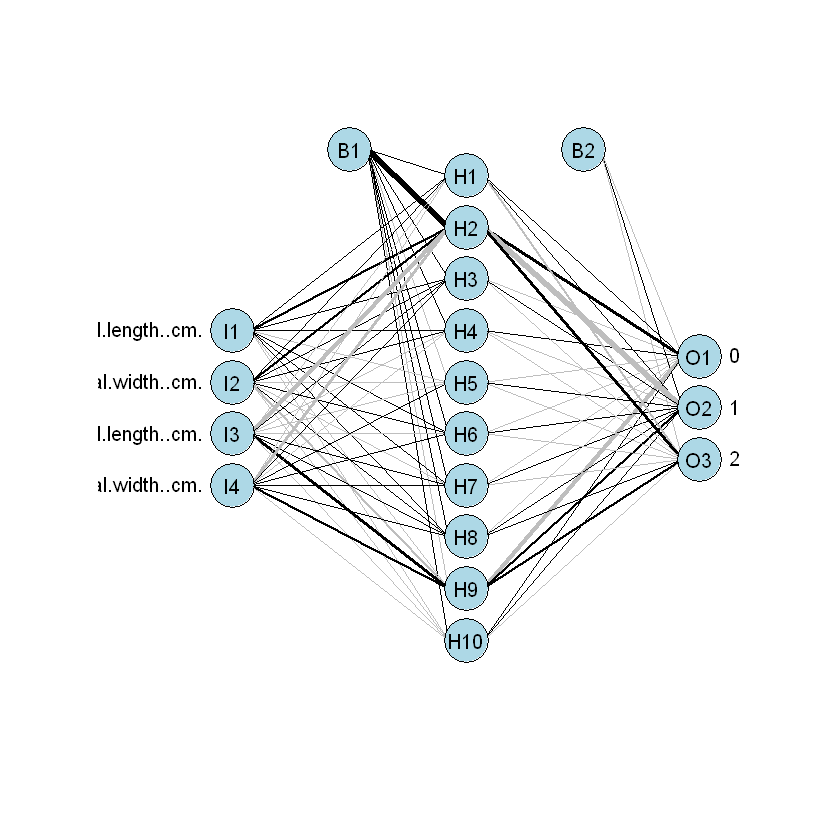

In [5]:
#인공신경망 그래프
library(devtools)

source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')

plot.nnet(model)

In [6]:
# library(NeuralNetTools)
# garson(model) #변수의 중요도 그래프, 요소를 3클래스로 만들면 사용 못함

Warning message:
"package 'NeuralNetTools' was built under R version 3.6.2"

ERROR: Error in garson.default(wts_in, x_names, y_names, ...): Garson only applies to neural networks with one output node


In [11]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,X_train,type='class') 
table(y_train,pred)
mean(y_train == pred)

       pred
y_train  0  1  2
      0 40  0  0
      1  0 40  0
      2  0  0 40

[1] 1

In [12]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,X_test,type='class')
table(y_test,pred)
mean(y_test == pred)

      pred
y_test  0  1  2
     0 10  0  0
     1  0 10  0
     2  0  1  9

[1] 0.9666667